# The Project
Welcome! Here we will be building out a tool to visualize and analyze the differences in real versus simulated data from drone flights. We begin by importing and pip installing dependencies to be used later.

In [ ]:
#import dependencies
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default='colab'

In [ ]:
#pip install dependencies
%pip install geopandas
%pip install movingpandas
%pip install plotly

Next, we read in all the csv's and divide by real and simulated sets.

In [ ]:
#read and concat all simulated trajectories into a single Dataframe, with a unique 'trajectory' ID
sim0 = pd.read_csv('simulated_0.csv',sep=',',header=0)
sim0['trajectory_id'] = 8

sim1 = pd.read_csv('simulated_1.csv',sep=',',header=0)
sim1['trajectory_id'] = 9

sim2 = pd.read_csv('simulated_2.csv',sep=',',header=0)
sim2['trajectory_id'] = 10

sim3 = pd.read_csv('simulated_3.csv',sep=',',header=0)
sim3['trajectory_id'] = 11

sim4 = pd.read_csv('simulated_4.csv',sep=',',header=0)
sim4['trajectory_id'] = 12
sims = [sim0, sim1, sim2, sim3, sim4]

In [ ]:
#read and concat all real trajectories into a single Dataframe, with a unique 'trajectory' ID
real0 = pd.read_csv('real_0.csv',sep=',',header=0)
real0['trajectory_id'] = 1

real1 = pd.read_csv('real_1.csv',sep=',',header=0)
real1['trajectory_id'] = 2

real2 = pd.read_csv('real_2.csv',sep=',',header=0)
real2['trajectory_id'] = 3

real3 = pd.read_csv('real_3.csv',sep=',',header=0)
real3['trajectory_id'] = 4

real4 = pd.read_csv('real_4.csv',sep=',',header=0)
real4['trajectory_id'] = 5

real5 = pd.read_csv('real_5.csv',sep=',',header=0)
real5['trajectory_id'] = 6

real6 = pd.read_csv('real_6.csv',sep=',',header=0)
real6['trajectory_id'] = 7
reals = [real0, real1, real2, real3, real4, real5, real6]

Here I mark all path sets by stage (pre-launch, launch, delivery, recovery, post-recovery) based on time-stamp, with reference to the given metadata.

In [ ]:
#mark all stages: pre-launch, launch, delivery, recovery, post-recovery in all sets
metadata = pd.read_csv('metadata.csv', sep=',',header=0)
recoverytimes = metadata['time_to_recovery_s']
deliverytimes = metadata['time_to_delivery_s']

#label real
for i in range(len(reals)):
  path = reals[i]
  stage = []
  for second in path['seconds_since_launch']:
    if second < 0:
      stage.append('Pre-Launch')
    elif (second >= 0) and (second < 5):
      stage.append('Launch')
    elif (second > (deliverytimes[i]-10)) and (second < (deliverytimes[i] +10)):
      stage.append('Delivery')
    elif (second > (recoverytimes[i]-10)) and (second <(recoverytimes[i]+10)):
      stage.append('Recovery')
    elif second > (recoverytimes[i]+10):
      stage.append('Post-Recovery')
    else:
      stage.append('Cruise')
  path['Stage'] = stage

trajectories_real = pd.concat([real0, real1, real2, real3, real4, real5, real6], axis=0)

#label sims
for i in range(len(sims)):
  path = sims[i]
  stage = []
  for second in path['seconds_since_launch']:
    if second < 0:
      stage.append('Pre-Launch')
    elif (second >= 0) and (second < 5):
      stage.append('Launch')
    elif (second > (deliverytimes[i+7]-10)) and (second < (deliverytimes[i+7] +10)):
      stage.append('Delivery')
    elif (second > (recoverytimes[i+7]-10)) and (second <(recoverytimes[i+7]+10)):
      stage.append('Recovery')
    elif second > (recoverytimes[i+7]+5):
      stage.append('Post-Recovery')
    else:
      stage.append('Cruise')
  path['Stage'] = stage

trajectories_simulated = pd.concat([sim0, sim1, sim2, sim3, sim4], axis=0)

In [ ]:
trajectories_simulated.loc[trajectories_simulated['Stage']=='Cruise']

Now we can begin an analysis of each stage in real versus simulated data. We will break down each stage by providing some summary statistics on the variance and mean of position/velocity (pandas), followed by 3D visuals of position and velocity (plotly), followed by a textual analysis.

In [ ]:
import warnings
#what happens at launch?
#analyzing motion and velocity at launch

#all launch data here:
reallaunch = trajectories_real.loc[trajectories_real['Stage']=='Launch']
simlaunch = trajectories_simulated.loc[trajectories_simulated['Stage']=='Launch']

#let's get some basic stats on the uncertainty in position/velocity captured at launch (we'll make sense of this below):
#mean of standard deviation of motion and velocity
print('Simulated Mean of Motion StDev at Launch: \n', simlaunch[['position_sigma_ned_m[0]', 'position_sigma_ned_m[1]','position_sigma_ned_m[2]']].mean())
print('Real Mean of Motion StDev at Launch: \n', reallaunch[['position_sigma_ned_m[0]', 'position_sigma_ned_m[1]','position_sigma_ned_m[2]']].mean())
print('Simulated Mean of Velocity StDev at Launch: \n', simlaunch[['velocity_sigma_ned_mps[0]', 'velocity_sigma_ned_mps[1]', 'velocity_sigma_ned_mps[2]']].mean())
print('Real Mean of Velocity StDev at Launch: \n', reallaunch[['velocity_sigma_ned_mps[0]', 'velocity_sigma_ned_mps[1]', 'velocity_sigma_ned_mps[2]']].mean())

#visualizing the launch paths in 3d:
warnings.simplefilter("ignore")
pio.renderers.default='colab'

fig = px.line_3d(reallaunch, x='position_ned_m[0]', y='position_ned_m[1]', z= 'position_ned_m[2]', color = 'trajectory_id')
fig.update_traces(line=dict(width=5))
fig2 = px.line_3d(simlaunch, x='position_ned_m[0]', y='position_ned_m[1]', z= 'position_ned_m[2]', color = 'trajectory_id')
fig2.update_traces(line=dict(width=5))
fig3 = px.line_3d(reallaunch, x='velocity_ned_mps[0]', y='velocity_ned_mps[1]', z= 'velocity_ned_mps[2]', color = 'trajectory_id')
fig3.update_traces(line=dict(width=5))
fig4 = px.line_3d(simlaunch, x='velocity_ned_mps[0]', y='velocity_ned_mps[1]', z= 'velocity_ned_mps[2]', color = 'trajectory_id')
fig4.update_traces(line=dict(width=5))

fig.update_layout(title='Real Launch Motion', scene = dict(xaxis_title = 'North', yaxis_title = 'East', zaxis_title = 'Down'))
fig2.update_layout(title='Simulated Launch Motion', scene = dict(xaxis_title = 'North', yaxis_title = 'East', zaxis_title = 'Down'))
fig3.update_layout(title='Real Launch Velocity', scene = dict(xaxis_title = 'North', yaxis_title = 'East', zaxis_title = 'Down'))
fig4.update_layout(title='Simulated Launch Velocity', scene = dict(xaxis_title = 'North', yaxis_title = 'East', zaxis_title = 'Down'))

fig.show(renderer='colab')
fig2.show(renderer='colab')
fig3.show(renderer='colab')
fig4.show(renderer='colab')

Simulated Mean of Motion StDev at Launch: 
 position_sigma_ned_m[0]    0.205145
position_sigma_ned_m[1]    0.212294
position_sigma_ned_m[2]    0.223827
dtype: float64
Real Mean of Motion StDev at Launch: 
 position_sigma_ned_m[0]    0.539080
position_sigma_ned_m[1]    0.531782
position_sigma_ned_m[2]    0.605650
dtype: float64
Simulated Mean of Velocity StDev at Launch: 
 velocity_sigma_ned_mps[0]    0.147546
velocity_sigma_ned_mps[1]    0.151714
velocity_sigma_ned_mps[2]    0.148211
dtype: float64
Real Mean of Velocity StDev at Launch: 
 velocity_sigma_ned_mps[0]    0.327568
velocity_sigma_ned_mps[1]    0.323396
velocity_sigma_ned_mps[2]    0.318262
dtype: float64


Overall, this analysis shows a few concerning difference with regards to the simulated data. From the statistics up top, we see firstly that the simulated data under-represents variance of motion and velocity on launch - the real variance (by measure of standard deviation) of launch motion is 2-3 times more than the simulations show. The simulated data is significantly under-representing uncertainty.  Real motion is 2.6 times more variable than the simulation and real velocity is 2.3 times more variable. This is shown in the graphs too: the lines representing real motion/velocity are increasing, but not completely linear (zooming in shows more non-linearity), while the simulated launch data are smoother lines.

From the visuals we see another concerning difference: the starting position of simulated data comes from different places! The real data shows drones all originating from the same place in 3D space. The reasons for this are uncertain, maybe to do with parameters in how the simulated data were created. Note: this also causes the velocity graph to be relatively inconclusive, but we can still observe the relative linearity compared to real data.

Let's check out the differences on delivery.

In [ ]:
#what happens at delivery?

#all delivery data :
realdel = trajectories_real.loc[trajectories_real['Stage']=='Delivery']
simdel = trajectories_simulated.loc[trajectories_simulated['Stage']=='Delivery']

#mean of standard deviation of motion and velocity upon delivery:
print('Simulated Mean of Motion StDev at Delivery: \n', simdel[['position_sigma_ned_m[0]', 'position_sigma_ned_m[1]','position_sigma_ned_m[2]']].mean())
print('Real Mean of Motion StDev at Delivery: \n', realdel[['position_sigma_ned_m[0]', 'position_sigma_ned_m[1]','position_sigma_ned_m[2]']].mean())
print('Simulated Mean of Velocity StDev at Delivery: \n', simdel[['velocity_sigma_ned_mps[0]', 'velocity_sigma_ned_mps[1]', 'velocity_sigma_ned_mps[2]']].mean())
print('Real Mean of Velocity StDev at Delivery: \n', realdel[['velocity_sigma_ned_mps[0]', 'velocity_sigma_ned_mps[1]', 'velocity_sigma_ned_mps[2]']].mean())

#visualize delivery paths in 3d by trajectory_id:
warnings.simplefilter("ignore")
pio.renderers.default='colab'

fig = px.line_3d(realdel, x='position_ned_m[0]', y='position_ned_m[1]', z= 'position_ned_m[2]', color = 'trajectory_id')
fig.update_traces(line=dict(width=5))
fig2 = px.line_3d(simdel, x='position_ned_m[0]', y='position_ned_m[1]', z= 'position_ned_m[2]', color = 'trajectory_id')
fig2.update_traces(line=dict(width=5))

fig.update_layout(title='Real Delivery Motion', scene = dict(xaxis_title = 'North', yaxis_title = 'East', zaxis_title = 'Down'))
fig2.update_layout(title='Simulated Delivery Motion', scene = dict(xaxis_title = 'North', yaxis_title = 'East', zaxis_title = 'Down'))

fig.show(renderer='colab')
fig2.show(renderer='colab')


Simulated Mean of Motion StDev at Delivery: 
 position_sigma_ned_m[0]   NaN
position_sigma_ned_m[1]   NaN
position_sigma_ned_m[2]   NaN
dtype: float64
Real Mean of Motion StDev at Delivery: 
 position_sigma_ned_m[0]    0.057856
position_sigma_ned_m[1]    0.064350
position_sigma_ned_m[2]    0.117149
dtype: float64
Simulated Mean of Velocity StDev at Delivery: 
 velocity_sigma_ned_mps[0]   NaN
velocity_sigma_ned_mps[1]   NaN
velocity_sigma_ned_mps[2]   NaN
dtype: float64
Real Mean of Velocity StDev at Delivery: 
 velocity_sigma_ned_mps[0]    0.038256
velocity_sigma_ned_mps[1]    0.040441
velocity_sigma_ned_mps[2]    0.042537
dtype: float64


From the statistics, we again notice that the real data is more variable than the simulated data, with roughly twice as much variance in position tracking on delivery and only slightly more variance in velocity tracking *.
From the position graphs, we can tell a lot more. I noticed that the peaks (likely representing the delivery point since the range of the 'delivery' stage is equally spread out 10 seconds before and after the time of delivery) are coherent in the real data but not in the simulations. This means the simulations are misrepresenting the exact point of delivery, which could be costly later down the road when improving on drone delivery accuracy. I would investigate how the simulation data were created to better improve this.

**For this reason and also because delivery is a point where velocity is not linearly increasing/decreasing, I chose not to plot velocity here, and instead chose to focus on position tracking as this is more important for delivery accuracy. **

Finally, we will look at data upon drone recovery.

In [ ]:
#what happens at recovery?
#all recovery data:
import warnings
realrec = trajectories_real.loc[trajectories_real['Stage']=='Recovery']
simrec = trajectories_simulated.loc[trajectories_simulated['Stage']=='Recovery']

#mean of standard deviation of motion and velocity upon recovery:
print('Simulated Mean of Motion StDev at Recovery: \n', simrec[['position_sigma_ned_m[0]', 'position_sigma_ned_m[1]','position_sigma_ned_m[2]']].mean())
print('Real Mean of Motion StDev at Recovery: \n', realrec[['position_sigma_ned_m[0]', 'position_sigma_ned_m[1]','position_sigma_ned_m[2]']].mean())
print('Simulated Mean of Velocity StDev at Recovery: \n', simrec[['velocity_sigma_ned_mps[0]', 'velocity_sigma_ned_mps[1]', 'velocity_sigma_ned_mps[2]']].mean())
print('Real Mean of Velocity StDev at Recovery: \n', realrec[['velocity_sigma_ned_mps[0]', 'velocity_sigma_ned_mps[1]', 'velocity_sigma_ned_mps[2]']].mean())

#visualize the recovery flight path in 3D, by trajectory_id
warnings.simplefilter("ignore")
pio.renderers.default='colab'

fig = px.line_3d(realrec, x='position_ned_m[0]', y='position_ned_m[1]', z= 'position_ned_m[2]', color = 'trajectory_id')
fig.update_traces(line=dict(width=5))
fig2 = px.line_3d(simrec, x='position_ned_m[0]', y='position_ned_m[1]', z= 'position_ned_m[2]', color = 'trajectory_id')
fig2.update_traces(line=dict(width=5))
fig3 = px.line_3d(realrec, x='velocity_ned_mps[0]', y='velocity_ned_mps[1]', z= 'velocity_ned_mps[2]', color = 'trajectory_id')
fig3.update_traces(line=dict(width=5))
fig4 = px.line_3d(simrec, x='velocity_ned_mps[0]', y='velocity_ned_mps[1]', z= 'velocity_ned_mps[2]', color = 'trajectory_id')
fig4.update_traces(line=dict(width=5))

fig.update_layout(title='Real Recovery Motion', scene = dict(xaxis_title = 'North', yaxis_title = 'East', zaxis_title = 'Down'))
fig2.update_layout(title='Simulated Recovery Motion', scene = dict(xaxis_title = 'North', yaxis_title = 'East', zaxis_title = 'Down'))
fig3.update_layout(title='Real Recovery Velocity', scene = dict(xaxis_title = 'North', yaxis_title = 'East', zaxis_title = 'Down'))
fig4.update_layout(title='Simulated Recovery Velocity', scene = dict(xaxis_title = 'North', yaxis_title = 'East', zaxis_title = 'Down'))

fig.show(renderer='colab')
fig2.show(renderer='colab')
fig3.show(renderer='colab')
fig4.show(renderer='colab')

Simulated Mean of Motion StDev at Recovery: 
 position_sigma_ned_m[0]    0.051071
position_sigma_ned_m[1]    0.051933
position_sigma_ned_m[2]    0.070746
dtype: float64
Real Mean of Motion StDev at Recovery: 
 position_sigma_ned_m[0]    0.352442
position_sigma_ned_m[1]    0.355983
position_sigma_ned_m[2]    0.469218
dtype: float64
Simulated Mean of Velocity StDev at Recovery: 
 velocity_sigma_ned_mps[0]    0.057187
velocity_sigma_ned_mps[1]    0.059888
velocity_sigma_ned_mps[2]    0.064877
dtype: float64
Real Mean of Velocity StDev at Recovery: 
 velocity_sigma_ned_mps[0]    0.163250
velocity_sigma_ned_mps[1]    0.171188
velocity_sigma_ned_mps[2]    0.124123
dtype: float64


Here, as with launch, we notice the largest discrepency in variance of motion/velocity data capture between the simulated and real datasets. From the statistics up top, we see a position variance nearly 10 times larger on recovery in reality than in simulations and a velocity variance around 3 times larger. This could be attributed to the fact that at launch and recovery the drone undergoes the most drastic changes in position/speed with respect to time.

The graphs here are full of insights. From the position graphs, we notice a 'hook'-like shape in the middle, likely representing the motion to and from the point of recovery when the drone attempts recovery multiple times. From the velocity graphs, we also see the visual messiness that comes from multiple recovery attempts, resulting in 'loopiness' seen in the graph as the drone decelerates for recovery and then re-accelerates for another attempt. The real velocity data shows significantly more work on the drone in the process of re-attempting recovery, shown by the noisy loops in the graph compated to the smoother loops in the simulated velocity graph. This extra 'work' by the drone in recovery could mean the simulations are underrepresenting the drone battery life needed for extra recovery attempts. I would look into how the team can improve simulation data of these recovery and delivery stages to more efficiently allocate for battery spend.

In [ ]:
#what happens during cruise time?
#bonus analysis


#all cruise data here:
realcruise = trajectories_real.loc[trajectories_real['Stage']=='Cruise']
simcruise = trajectories_simulated.loc[trajectories_simulated['Stage']=='Cruise']

#mean of standard deviation of motion and velocity on cruise:
print('Simulated Mean of Motion StDev on Cruise: \n', simlaunch[['position_sigma_ned_m[0]', 'position_sigma_ned_m[1]','position_sigma_ned_m[2]']].mean())
print('Real Mean of Motion StDev on Cruise: \n', reallaunch[['position_sigma_ned_m[0]', 'position_sigma_ned_m[1]','position_sigma_ned_m[2]']].mean())
print('Simulated Mean of Velocity StDev on Cruise: \n', simlaunch[['velocity_sigma_ned_mps[0]', 'velocity_sigma_ned_mps[1]', 'velocity_sigma_ned_mps[2]']].mean())
print('Real Mean of Velocity StDev on Cruise: \n', reallaunch[['velocity_sigma_ned_mps[0]', 'velocity_sigma_ned_mps[1]', 'velocity_sigma_ned_mps[2]']].mean())



Simulated Mean of Motion StDev on Cruise: 
 position_sigma_ned_m[0]    0.205145
position_sigma_ned_m[1]    0.212294
position_sigma_ned_m[2]    0.223827
dtype: float64
Real Mean of Motion StDev on Cruise: 
 position_sigma_ned_m[0]    0.539080
position_sigma_ned_m[1]    0.531782
position_sigma_ned_m[2]    0.605650
dtype: float64
Simulated Mean of Velocity StDev on Cruise: 
 velocity_sigma_ned_mps[0]    0.147546
velocity_sigma_ned_mps[1]    0.151714
velocity_sigma_ned_mps[2]    0.148211
dtype: float64
Real Mean of Velocity StDev on Cruise: 
 velocity_sigma_ned_mps[0]    0.327568
velocity_sigma_ned_mps[1]    0.323396
velocity_sigma_ned_mps[2]    0.318262
dtype: float64


Cruise data shows again a roughly 2-3 times higher uncertainty in position and velocity for real data.

As a bonus for visual completeness, I added a 2D graph collection of cruise trajectories below (using moving pandas because plotly couldn't handle the size of cruise data). I'm plotting in 2D because I'm assuming a relatively stable drone trajectory in the Z-axis during cruise and because we're only trying to visualize the broad paths here, not depth.  

In [ ]:
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
from datetime import datetime, timedelta
import plotly.express as px
import warnings
warnings.simplefilter("ignore")
# Create trajectories

real_collection = mpd.TrajectoryCollection(realcruise, 'trajectory_id', t='seconds_since_launch', x='position_ned_m[0]', y='position_ned_m[1]')
sim_collection = mpd.TrajectoryCollection(simcruise, 'trajectory_id', t='seconds_since_launch', x='position_ned_m[0]', y='position_ned_m[1]')
print(real_collection)
print(sim_collection)

TrajectoryCollection with 7 trajectories
TrajectoryCollection with 5 trajectories


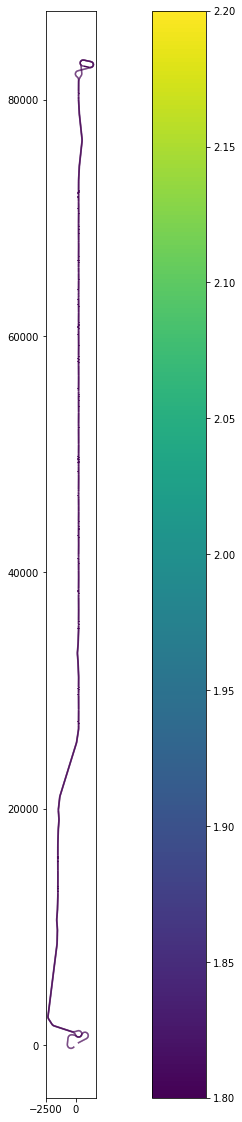

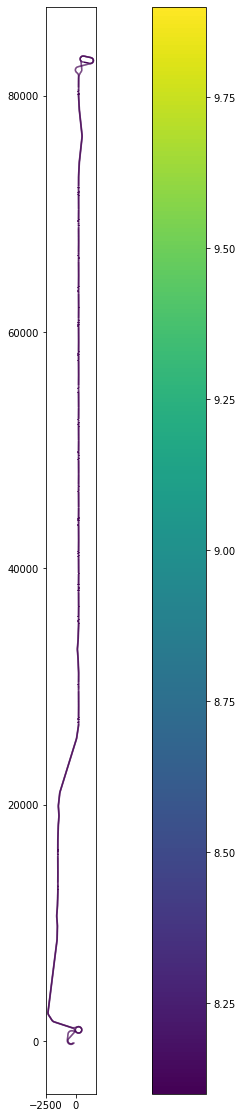

In [ ]:
#plotting one cruise trajectory at a time, top is real, bottom is simulated
real_traj = real_collection.trajectories[1]
real_traj.plot(column='trajectory_id', legend=True, figsize=(20, 20), aspect=1)

sim_traj = sim_collection.trajectories[1]
sim_traj.plot(column='trajectory_id', legend=True, figsize=(20, 20), aspect=1)

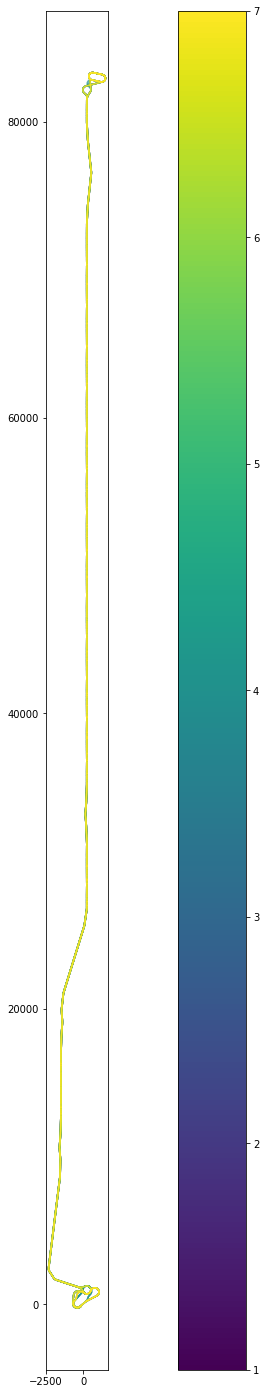

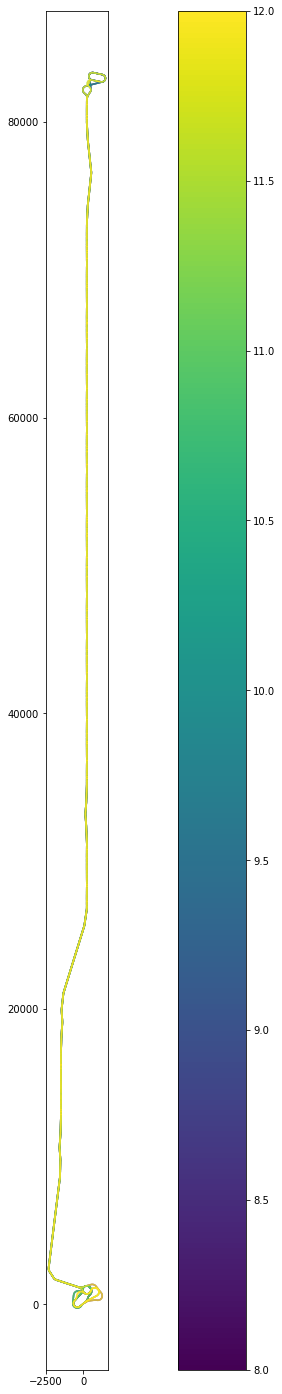

In [ ]:
#plotting all simulated trajectories, top is real, bottom is simulated
real_collection.plot(column='trajectory_id', legend=True, figsize=(25, 25), aspect=1)
sim_collection.plot(column='trajectory_id', legend=True, figsize=(25, 25), aspect=1)

While these cruise graphs may be inconclusive, they allow for a decent visualization of the drones' broad path. That concludes things. Further analysis could be done on the cruise data, but that's for another project!